[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/gcmatos/python-para-geociencias/blob/master/notebooks/2.2%20EDA%20Registro%20de%20Terremotos%20USGS.ipynb)

Ctrl/Cmd + click para abrir em uma nova aba do navegador web e utilizar o Google Colab para rodar o tutorial.

# Análise Exploratória de Dados
__*Registro USGS de terremotos desde 1965*__

Fonte: [https://www.kaggle.com/usgs/earthquake-database](https://www.kaggle.com/usgs/earthquake-database)

## Configuração de ambiente

### Instalação de dependências

In [1]:
# Instalar GeoPandas e dependências
# !pip install shapely fiona six geopandas

### Importar bibliotecas

In [2]:
# Processamento
import numpy as np
import pandas as pd
import geopandas as gpd
import cartopy
import cartopy.crs as ccrs
from shapely.geometry import Point

# Visualizacao
import matplotlib.pyplot as plt
import seaborn as sns

# Filtrar alertas
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Matplotlib em células de códigos
%matplotlib inline

In [4]:
# Matplotlib style (opcional)
plt.style.use('default')

### Subir arquivo com registros de terremotos
Subir o arquivo **`earthquakes-database.csv`**

In [5]:
# Subir arquivo

### Importação dos dados

In [6]:
df = pd.read_csv("../data/earthquakes-database.csv")

## Auditando dados
> [Descrição das variáveis na USGS](https://earthquake.usgs.gov/data/comcat/data-eventterms.php)


Trata-se de uma série ou uma tabela de atributos?

In [7]:
df.head()
# df.sample(5)
# df.tail()

Date      Time  Latitude  Longitude        Type  Depth  Depth Error  \
0  01/02/1965  13:44:18    19.246    145.616  Earthquake  131.6          NaN   
1  01/04/1965  11:29:49     1.863    127.352  Earthquake   80.0          NaN   
2  01/05/1965  18:05:58   -20.579   -173.972  Earthquake   20.0          NaN   
3  01/08/1965  18:49:43   -59.076    -23.557  Earthquake   15.0          NaN   
4  01/09/1965  13:32:50    11.938    126.427  Earthquake   15.0          NaN   

   Depth Seismic Stations  Magnitude Magnitude Type  ...  \
0                     NaN        6.0             MW  ...   
1                     NaN        5.8             MW  ...   
2                     NaN        6.2             MW  ...   
3                     NaN        5.8             MW  ...   
4                     NaN        5.8             MW  ...   

   Magnitude Seismic Stations  Azimuthal Gap  Horizontal Distance  \
0                         NaN            NaN                  NaN   
1                         NaN            NaN                  NaN   
2                         NaN            NaN                  NaN   
3                         NaN            NaN                  NaN   
4                         NaN            NaN                  NaN   

   Horizontal Error  Root Mean Square            ID  Source Location Source  \
0               NaN               NaN  ISCGEM860706  ISCGEM          ISCGEM   
1               NaN               NaN  ISCGEM860737  ISCGEM          ISCGEM   
2               NaN               NaN  ISCGEM860762  ISCGEM          ISCGEM   
3               NaN               NaN  ISCGEM860856  ISCGEM          ISCGEM   
4               NaN               NaN  ISCGEM860890  ISCGEM          ISCGEM   

  Magnitude Source     Status  
0           ISCGEM  Automatic  
1           ISCGEM  Automatic  
2           ISCGEM  Automatic  
3           ISCGEM  Automatic  
4           ISCGEM  Automatic  

[5 rows x 21 columns]

Quais são os nomes (*labels*) das variáveis (colunas)?


In [8]:
df.columns
# for i in earthquakes.columns:
#     print(i)

Index(['Date', 'Time', 'Latitude', 'Longitude', 'Type', 'Depth', 'Depth Error',
       'Depth Seismic Stations', 'Magnitude', 'Magnitude Type',
       'Magnitude Error', 'Magnitude Seismic Stations', 'Azimuthal Gap',
       'Horizontal Distance', 'Horizontal Error', 'Root Mean Square', 'ID',
       'Source', 'Location Source', 'Magnitude Source', 'Status'],
      dtype='object')

Resumo dos tipos de variáveis presentes no dataset:

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23412 entries, 0 to 23411
Data columns (total 21 columns):
Date                          23412 non-null object
Time                          23412 non-null object
Latitude                      23412 non-null float64
Longitude                     23412 non-null float64
Type                          23412 non-null object
Depth                         23412 non-null float64
Depth Error                   4461 non-null float64
Depth Seismic Stations        7097 non-null float64
Magnitude                     23412 non-null float64
Magnitude Type                23409 non-null object
Magnitude Error               327 non-null float64
Magnitude Seismic Stations    2564 non-null float64
Azimuthal Gap                 7299 non-null float64
Horizontal Distance           1604 non-null float64
Horizontal Error              1156 non-null float64
Root Mean Square              17352 non-null float64
ID                            23412 non-null object
Sou

Resumo estatístico das variáveis numéricas:

In [10]:
df.describe()

Latitude     Longitude         Depth  Depth Error  \
count  23412.000000  23412.000000  23412.000000  4461.000000   
mean       1.679033     39.639961     70.767911     4.993115   
std       30.113183    125.511959    122.651898     4.875184   
min      -77.080000   -179.997000     -1.100000     0.000000   
25%      -18.653000    -76.349750     14.522500     1.800000   
50%       -3.568500    103.982000     33.000000     3.500000   
75%       26.190750    145.026250     54.000000     6.300000   
max       86.005000    179.998000    700.000000    91.295000   

       Depth Seismic Stations     Magnitude  Magnitude Error  \
count             7097.000000  23412.000000       327.000000   
mean               275.364098      5.882531         0.071820   
std                162.141631      0.423066         0.051466   
min                  0.000000      5.500000         0.000000   
25%                146.000000      5.600000         0.046000   
50%                255.000000      5.700000         0.059000   
75%                384.000000      6.000000         0.075500   
max                934.000000      9.100000         0.410000   

       Magnitude Seismic Stations  Azimuthal Gap  Horizontal Distance  \
count                 2564.000000    7299.000000          1604.000000   
mean                    48.944618      44.163532             3.992660   
std                     62.943106      32.141486             5.377262   
min                      0.000000       0.000000             0.004505   
25%                     10.000000      24.100000             0.968750   
50%                     28.000000      36.000000             2.319500   
75%                     66.000000      54.000000             4.724500   
max                    821.000000     360.000000            37.874000   

       Horizontal Error  Root Mean Square  
count       1156.000000      17352.000000  
mean           7.662759          1.022784  
std           10.430396          0.188545  
min            0.085000          0.000000  
25%            5.300000          0.900000  
50%            6.700000          1.000000  
75%            8.100000          1.130000  
max           99.000000          3.440000

### Valores nulos

Como estão distribuidos os valores nulos no dataset?

In [11]:
df.isnull().sum().sort_values()

Date                              0
Location Source                   0
Source                            0
ID                                0
Magnitude Source                  0
Magnitude                         0
Status                            0
Depth                             0
Type                              0
Longitude                         0
Latitude                          0
Time                              0
Magnitude Type                    3
Root Mean Square               6060
Azimuthal Gap                 16113
Depth Seismic Stations        16315
Depth Error                   18951
Magnitude Seismic Stations    20848
Horizontal Distance           21808
Horizontal Error              22256
Magnitude Error               23085
dtype: int64

### Variáveis categóricas

Como é a distribuição das variáveis categóricas?

In [12]:
# Tipos de sísmos
df['Type'].value_counts()

Earthquake           23232
Nuclear Explosion      175
Explosion                4
Rock Burst               1
Name: Type, dtype: int64

In [13]:
# Medidas de magnitude dos sísmos
df['Magnitude Type'].value_counts()

MW     7722
MWC    5669
MB     3761
MWB    2458
MWW    1983
MS     1702
ML       77
MWR      26
MD        6
MH        5
Name: Magnitude Type, dtype: int64

### Séries de tempo

As variáveis de tempo foram identificadas corretamente durante a importação?

In [14]:
df['Date'].dtype, df['Time'].dtype

(dtype('O'), dtype('O'))

É necessário transformar estas variáveis em `datetime`?

In [15]:
df['Date'] = pd.to_datetime(df['Date'], utc=True)

A variável 'Date' pode ser decomposta em uma nova variável 'Year' para realizarmos estatísticas por ano?

In [16]:
# Criar coluna 'Year' a partir da coluna 'Date'
df['Year'] = df['Date'].dt.year

In [17]:
# Converter a coluna 'Time' em datetime
df['Time'] = pd.to_datetime(df['Time'])

### Converter DataFrame em GeoDataFrame

Converter as colunas Latitude e Longitude em geometria `shapely` para converter o dataset em `GeoDataFrame`.

In [18]:
# Criar coluna 'geometry' com lista concatenada de Lon e Lat
df['geometry'] = list(zip(df.Longitude, df.Latitude))
# Converter lista em objeto shapely.geometry.Point
df['geometry'] = df['geometry'].apply(Point)
# Converter DataFrame em GeoDataFrame
gdf = gpd.GeoDataFrame(df, geometry='geometry')
# Inserir código para sistema de coordenadas WGS84
gdf.crs = {'init' :'epsg:4326'}

### Filtrar para visualização
Filtrar os tipos de sismos para melhor visualizar os dados.

In [19]:
# Filtrando sismos tectônicos e geológicos
earthquakes = gdf[gdf['Type'] == 'Earthquake']

In [20]:
# Filtrar sismos nucleares
nuclear_explosion = gdf[gdf['Type'] == 'Nuclear Explosion']

## Visualização


### Pré-visualização

Podemos fazer uma pré-visualização geoespacial, uma vez que estamos utilizando um `GeoDataFrame`

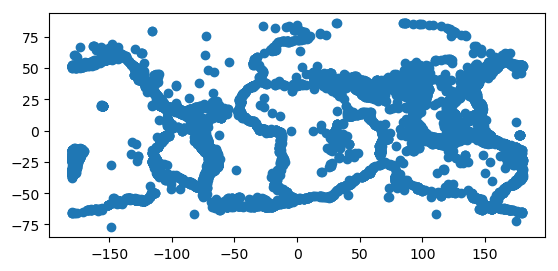

In [21]:
earthquakes.plot();

Podemos visualizar em apenas um gráfico todas as variáveis contínuas e suas relações para se ter um panorama das distribuições e correlações?

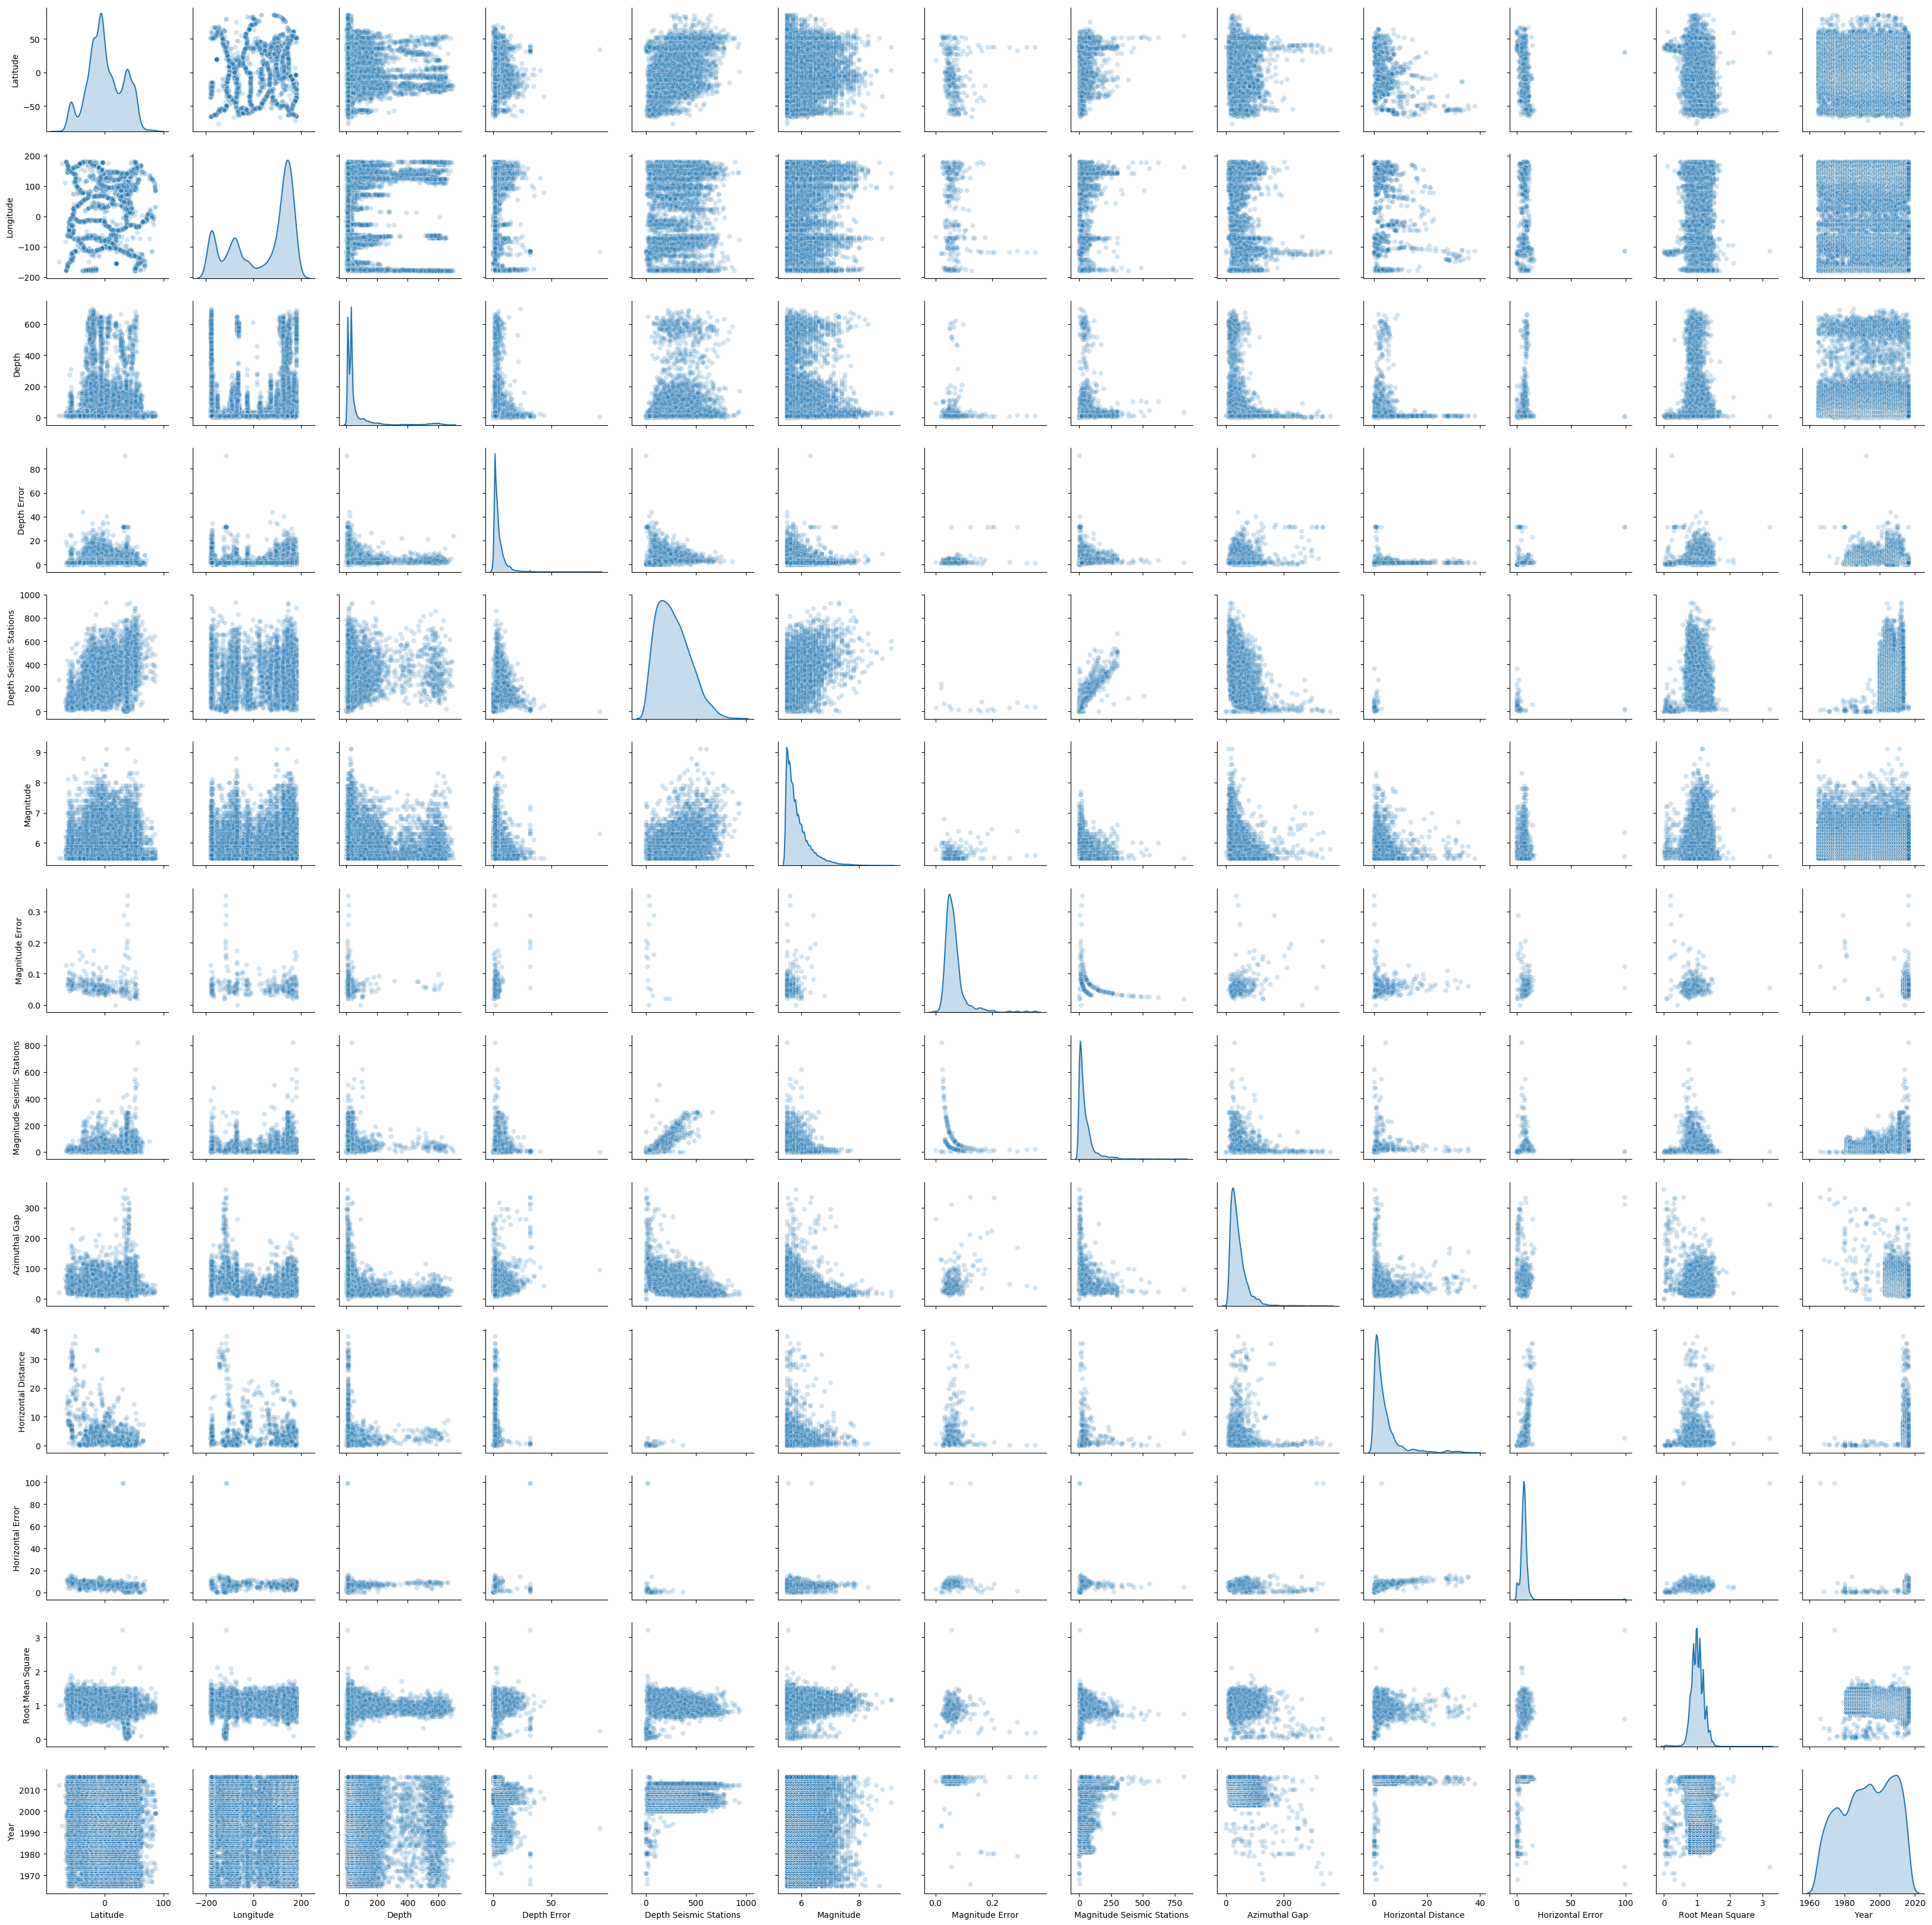

In [22]:
sns.pairplot(earthquakes, diag_kind='kde', plot_kws={'alpha': 0.2});

### Distribuição de variáveis

In [23]:
def line_plot(data):
    '''Plotar série de valores ordenados em gráfico de linha'''
    series = pd.Series(data).value_counts().sort_index()
    return series.plot()


def bar_plot(data):
    '''Plotar série de valores ordenados em gráfico de barras'''
    series = pd.Series(data).value_counts().sort_index()
    return series.plot(kind='bar')


def barh_plot(data):
    '''Plotar série de valores ordenados em gráfico de barras'''
    series = pd.Series(data).value_counts().sort_index()
    return series.plot(kind='barh')

### Distribuição de valores nulos

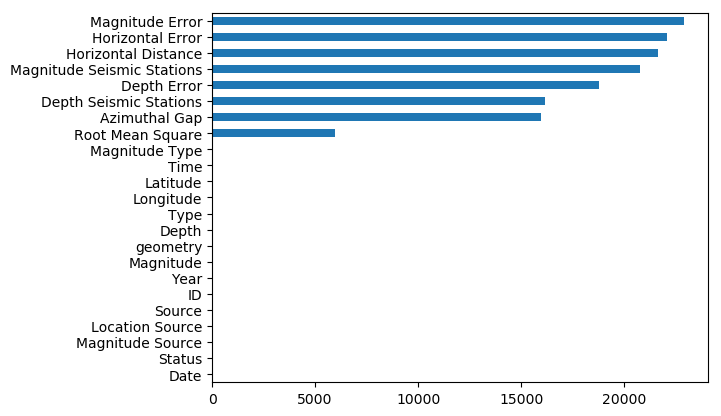

In [24]:
# Plotar a soma ordenada dos valores nulos por variável
earthquakes.isnull().sum().sort_values().plot.barh();

### Variáveis contínuas

Como é o histograma de distribuição de valores de magnitude, profundidade e etc.?

In [25]:
# Plotar histograma de Magnitude para terremotos

In [26]:
# Plotar histograma de Magnitude para explosões nucleares

In [27]:
# Plotar histograma das profundidades dos terremotos

### Variação ao longo do tempo
Como é a frequência do sismos ao longo do tempo?

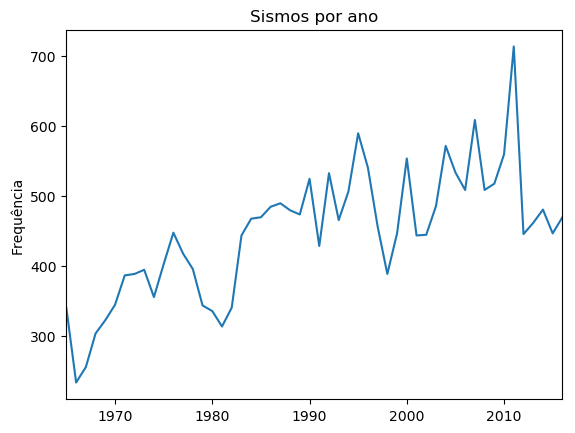

In [28]:
# earthquakes_geo['Year'].value_counts().sort_index().plot()
line_plot(earthquakes['Year'])
# Eixos do gráfico
plt.ylabel("Frequência")
plt.title("Sismos por ano")
plt.show()

Qual é o maior número de sismos?

In [29]:
earthquakes['Year'].value_counts().max()

713

Em qual ano se deu a maior ocorrência de terremotos?

In [30]:
earthquakes['Year'].value_counts().idxmax()

2011

Como é a distribuição de valores discretos de magnitude de sismos?


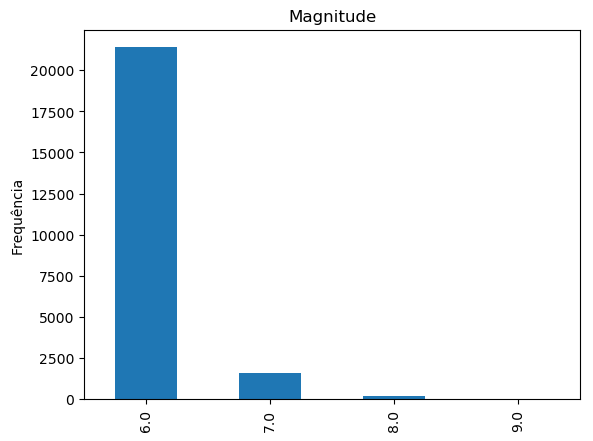

In [31]:
magnitudes_roundup = np.around(earthquakes["Magnitude"])
magnitudes_roundup.value_counts().sort_index().plot.bar()
plt.ylabel("Frequência")
plt.title("Magnitude")
plt.show()

Como fica a distribuição de sismos de explosões nucleares ao longo do tempo?

In [32]:
# Plotar a variação de sismos nucleares no tempo

### Correlações entre variáveis

Como é a distribuição de sismos por profundidade?

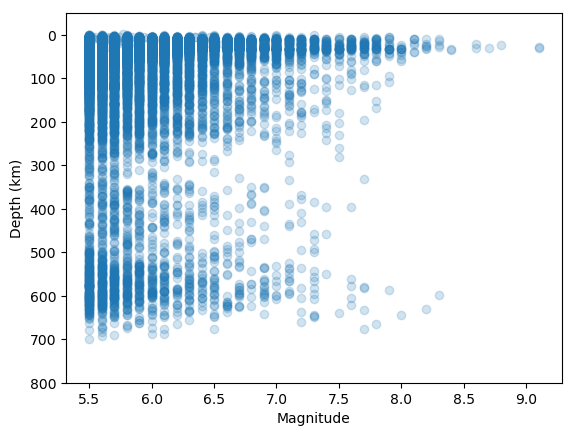

In [33]:
plt.scatter(earthquakes["Magnitude"], earthquakes["Depth"], alpha=0.2)
plt.ylim(800, -50)
plt.ylabel('Depth (km)')
plt.xlabel('Magnitude')
plt.show()

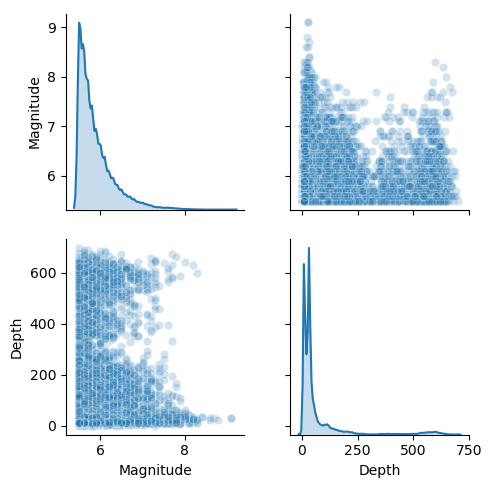

In [34]:
sns.pairplot(earthquakes[['Magnitude', 'Depth']], diag_kind='kde', plot_kws={'alpha': 0.2});

Como é a matriz de correlação entre as variáveis?

In [35]:
# Calcular a matrix de correlação
corr = earthquakes.corr()
# Plotar a matriz de correlação
corr.style.background_gradient(cmap='coolwarm').set_precision(2)

### Distribuição geoespacial

In [36]:
# Carregar o shape com os contornos dos países do GeoPandas.dataset
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

Como estão distribuídos os sismos do data set em termos de coordenadas geográficas?

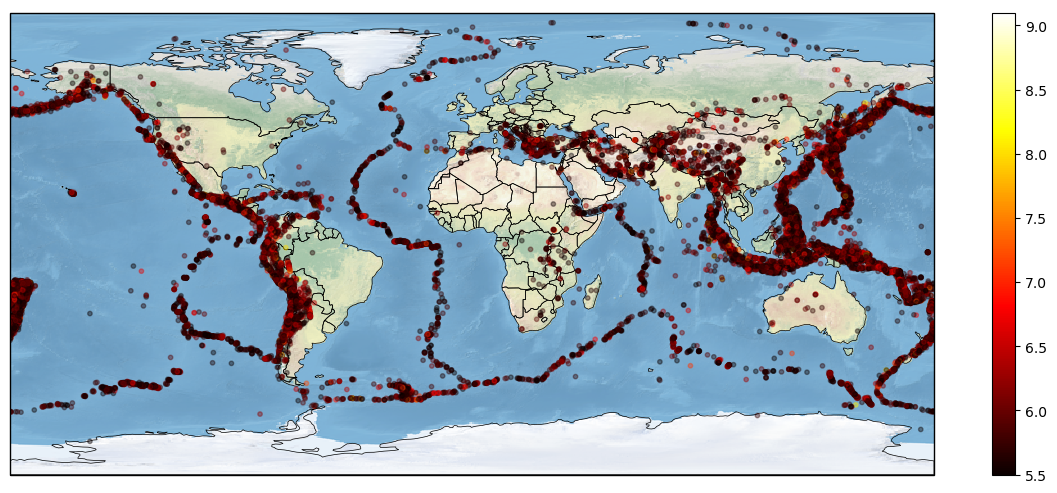

In [37]:
fig = plt.figure(figsize=(15, 6))
# Criar instancia Cartopy
ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())
# Adicionar raster de terreno
ax.stock_img()
# Plotar os contornos dos países com GeoPandas
world.plot(ax=ax, facecolor='none', linewidth=0.5, edgecolor='black')
# Plotar os registros dos terremotos
earthquakes.plot(ax=ax, column='Magnitude', markersize=10, alpha=0.4, cmap='hot', legend=True)
plt.show()

Como é a distribuição espacial de sismos entre 2012 e 2016?

In [38]:
# Filtrar sismos entre os anos de 2012 e 2016
last_earthquakes = earthquakes[(earthquakes["Year"] >= 2012) & (earthquakes["Year"] <= 2016)]

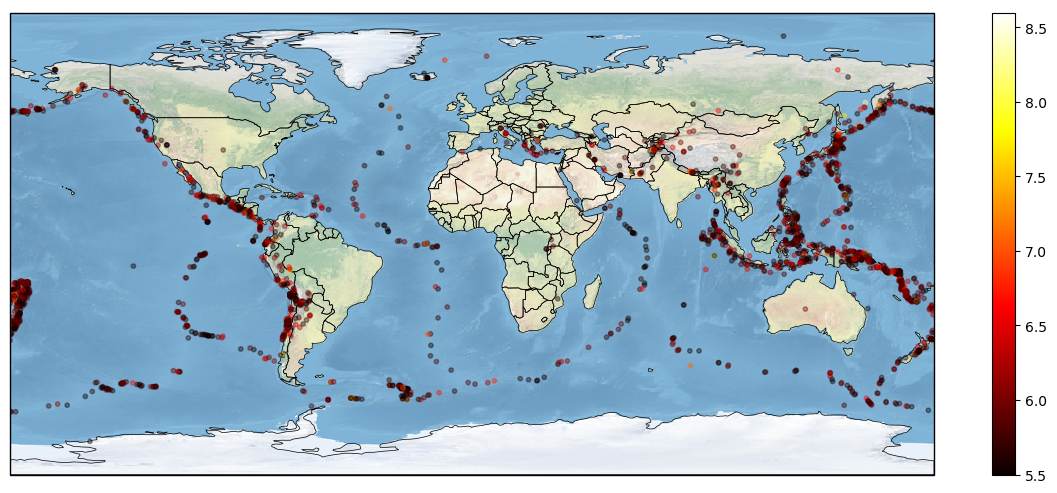

In [39]:
# Plotar mapa de sísmos entre 2012 e 2016
fig = plt.figure(figsize=(15, 6))
# Criar instancia Cartopy
ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())
# Adicionar raster de terreno
ax.stock_img()
# Plotar os contornos dos países com GeoPandas
world.plot(ax=ax, facecolor='none', linewidth=0.5, edgecolor='black')
# Plotar os registros dos terremotos
last_earthquakes.plot(ax=ax, column='Magnitude', markersize=10, alpha=0.4, cmap='hot', legend=True)
plt.show()

Como é a distribuição de terremotos com magnitude maior que 6.0?

In [40]:
# Filtrar sismos de magnitude maior que 8.0
greatest_earthquakes = earthquakes[earthquakes['Magnitude'] >= 8.0]

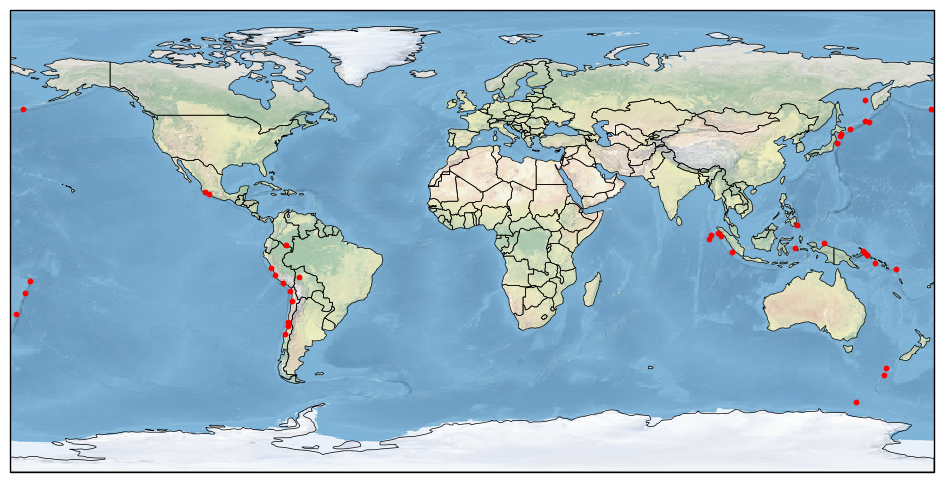

In [41]:
# Plotar mapa de sísmos entre 2012 e 2016
fig = plt.figure(figsize=(15, 6))
# Criar instancia Cartopy
ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())
# Adicionar raster de terreno
ax.stock_img()
# Plotar os contornos dos países com GeoPandas
world.plot(ax=ax, facecolor='none', linewidth=0.5, edgecolor='black')
# Plotar os registros dos terremotos
greatest_earthquakes.plot(ax=ax, color='red', markersize=10)
plt.show()